In [8]:
#!/bin/env python


import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"
import numpy as np
import time

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr


# from mpl_toolkits.basemap import Basemap


file_path = "/global/cscratch1/sd/karthik_/CAM5.1_0.25degree/"
from glob import glob

files = sorted(glob(file_path + "*"))
# print('\n'.join(map(str, files)))  

In [9]:
t = time.time()

ds = xr.open_dataset(files[0], decode_times=False	)
print("Time takes : ", time.time()-t)

Time takes :  1.2727982997894287


In [10]:
ds.keys()


KeysView(<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 768, lev: 30, lon: 1152, nbnd: 2, slat: 767, slon: 1152, time: 8)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
  * lat           (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon           (lon) float64 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * slat          (slat) float64 -89.88 -89.65 -89.41 ... 89.41 89.65 89.88
  * slon          (slon) float64 -0.1562 0.1562 0.4688 ... 358.9 359.2 359.5
Dimensions without coordinates: nbnd
Data variables:
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    P0            float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    w_stag        (s

In [11]:
ds["OMEGA500"].shape

(8, 768, 1152)

In [12]:
ds["OMEGA500"][:,0,0]


<xarray.DataArray 'OMEGA500' (time: 8)>
array([-0.011843, -0.025709, -0.030049, -0.022776, -0.038136, -0.028068,
       -0.002238,  0.024157], dtype=float32)
Coordinates:
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
    lat      float64 -90.0
    lon      float64 0.0
Attributes:
    units:         Pa/s
    long_name:     Vertical velocity at 500 mbar pressure surface
    cell_methods:  time: mean

In [13]:
ds["OMEGA500"][:,0,1]

<xarray.DataArray 'OMEGA500' (time: 8)>
array([-0.011843, -0.025709, -0.030049, -0.022776, -0.038136, -0.028068,
       -0.002238,  0.024157], dtype=float32)
Coordinates:
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
    lat      float64 -90.0
    lon      float64 0.3125
Attributes:
    units:         Pa/s
    long_name:     Vertical velocity at 500 mbar pressure surface
    cell_methods:  time: mean

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,20)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-9.689267 , -9.6881485, -9.687029 , ...,  6.7806125,  6.7817316,
         6.7828507], dtype=float32),
 <a list of 1 Patch objects>)

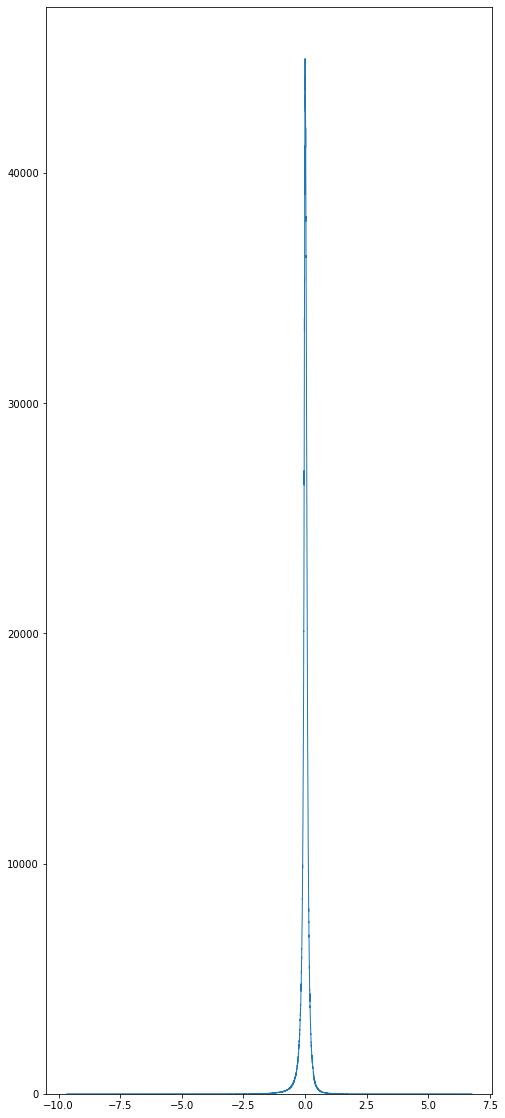

In [34]:
original_data = ds["OMEGA500"].values
plt.hist(original_data.flatten(), bins='fd', histtype='step')

In [30]:
data = ds["OMEGA500"][:, 128:640, 320:832].values
print(data.shape)

(8, 512, 512)


([array([1., 0., 0., ..., 0., 0., 1.]), array([1., 0., 0., ..., 0., 0., 0.])],
 array([-9.689267 , -9.688209 , -9.687149 , ...,  6.780733 ,  6.7817917,
         6.7828507], dtype=float32),
 <a list of 2 Lists of Patches objects>)

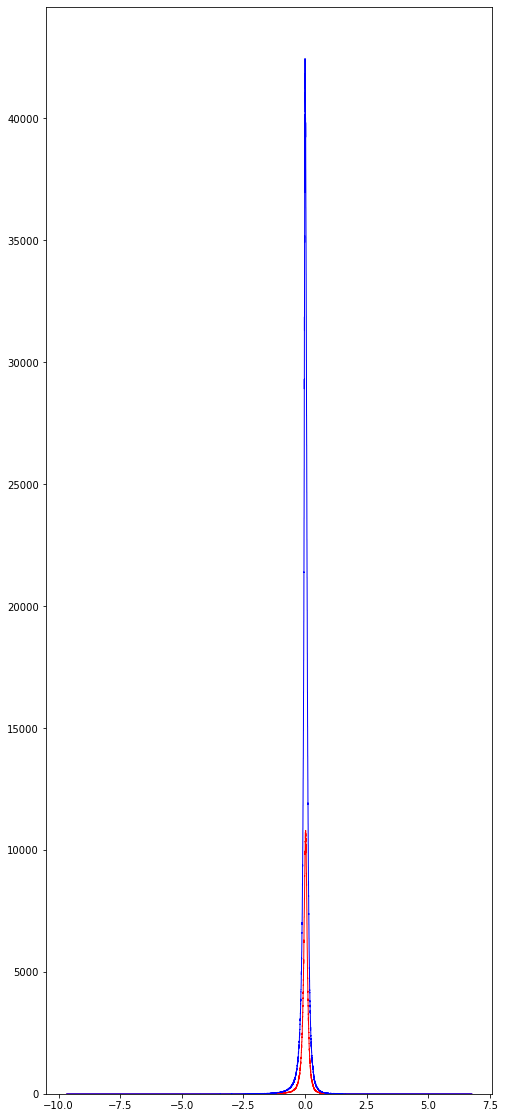

In [39]:
plt.hist([original_data.flatten(), data.flatten()], bins='fd', color=['b', 'r'], histtype='step')

In [23]:
max_val, min_val, std_val, mean_val = data.max(), data.min(), data.std(), data.mean()

In [24]:
print("Original all data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))

max_val 6.782850742340088  min_val -9.6892671585083  std_val 0.18770195543766022  mean_val 0.0004564703849609941 


In [25]:
data_normalized = (data-mean_val)/std_val

In [26]:
data_normalized.shape

(7077888,)

In [32]:
max_val, min_val, std_val, mean_val = data.max(), data.min(), data.std(), data.mean()

In [33]:
print("only relevant  data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))

only relevant  data max_val 2.8797972202301025  min_val -9.6892671585083  std_val 0.19376632571220398  mean_val 0.0007547858403995633 


In [42]:
list_of_omega_data = []
for file in files:
    t=time.time()
    tmp_ds = xr.open_dataset(file, decode_times=False)
    print("Time takes : ", time.time()-t)
    list_of_omega_data.append(tmp_ds["OMEGA500"][:, 128:640, 320:832].values)
    

Time takes :  0.023864269256591797
Time takes :  0.025614023208618164
Time takes :  0.026124954223632812
Time takes :  0.02542424201965332
Time takes :  0.02521538734436035
Time takes :  0.024729013442993164
Time takes :  0.026955366134643555
Time takes :  0.02469921112060547
Time takes :  0.02513909339904785
Time takes :  0.024843454360961914
Time takes :  0.0246737003326416
Time takes :  0.024850130081176758
Time takes :  0.026397228240966797
Time takes :  0.02453923225402832
Time takes :  0.02506709098815918
Time takes :  0.02464008331298828
Time takes :  0.024856090545654297
Time takes :  0.025044918060302734
Time takes :  0.024099111557006836
Time takes :  0.024486303329467773
Time takes :  0.024967670440673828
Time takes :  0.02462172508239746
Time takes :  0.02474379539489746
Time takes :  0.02772068977355957
Time takes :  0.02731466293334961
Time takes :  0.026745319366455078
Time takes :  0.02595233917236328
Time takes :  0.026487112045288086


In [43]:

final_data = np.concatenate(list_of_omega_data, axis=0)


In [45]:
final_data.shape
max_val, min_val, std_val, mean_val = final_data.max(), final_data.min(), final_data.std(), final_data.mean()
print("final_data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))
final_normalized_data = (final_data-mean_val)/std_val


final_data max_val 6.457225799560547  min_val -10.614160537719727  std_val 0.2059687376022339  mean_val -0.0023664627224206924 


([array([0., 0., 0., ..., 0., 0., 0.]), array([1., 0., 0., ..., 0., 0., 1.])],
 array([-51.521385, -51.520287, -51.519188, ...,  31.359806,  31.360905,
         31.362003], dtype=float32),
 <a list of 2 Lists of Patches objects>)

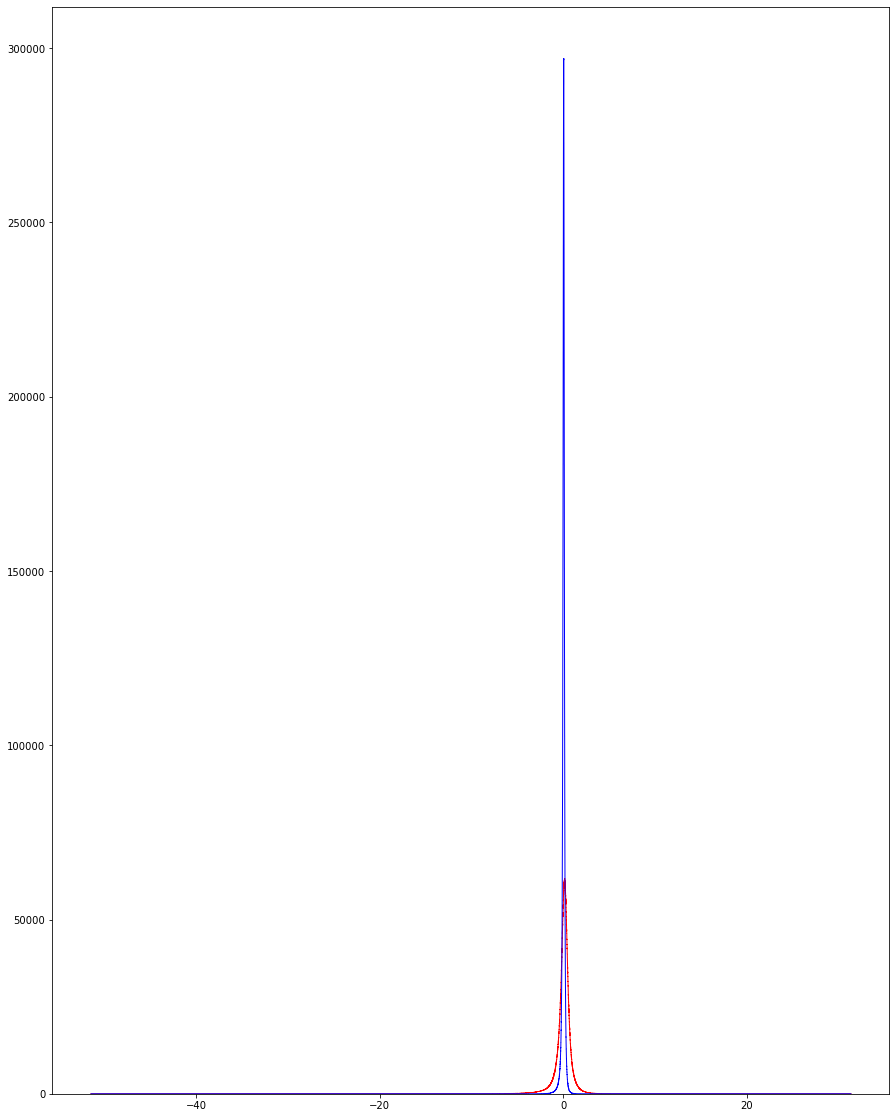

In [48]:
plt.hist([final_data.flatten(), final_normalized_data.flatten()], bins='fd', color=['b', 'r'], histtype='step')

In [50]:
total_seeds = [ np.random.randint(low=0, high=10000) for i in range(10)]

In [51]:
total_seeds

[8477, 4342, 5617, 6317, 1946, 2792, 9681, 2855, 4660, 2298]